## Regression : PyTorch

## Exercise - 01

### Simple derivative - x**2 + 2*x + 2

In [2]:
import torch
x = torch.tensor(2.0)
x.requires_grad_()      #Track gradients through forward pass
y = x**2 + 2*x + 2
y.backward()
x.grad #We will get 10 as  (d/dx (x**2 + 2*x) = 2 * x + 2 so at x=5 it will be 12)

tensor(6.)

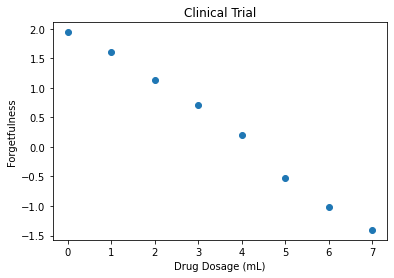

In [3]:
import torch
import matplotlib.pyplot as plt
x = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7.])
y = -0.5*x + 2 + torch.normal(mean = torch.zeros(8), std = 0.2)
fig, ax = plt.subplots()
plt.title("Clinical Trial")
plt.xlabel('Drug Dosage (mL)')
plt.ylabel('Forgetfulness')
_ = ax.scatter(x, y)

### Initialize slope with random value m = 0.9 and intercept b = 0.1

In [4]:
m = torch.tensor([0.9]).requires_grad_()
b = torch.tensor([0.1]).requires_grad_()
print(m, b)

tensor([0.9000], requires_grad=True) tensor([0.1000], requires_grad=True)


### Simple-most Regression Equation

In [5]:
#Define regression function
def regression(my_x, my_m, my_b):
    return my_m * my_x + my_b

## Simple function to plot regression

In [6]:
#Regression plot function
def regression_plot(my_x, my_y, my_m, my_b):
    fig, ax = plt.subplots()
    ax.scatter(my_x, my_y)
    x_min, x_max = ax.get_xlim()
    y_min = regression(x_min, my_m, my_b)
    y_max = regression(x_max, my_m, my_b)
    ax.set_xlim([x_min, x_max])
    _ = ax.plot([x_min, x_max], [y_min, y_max])

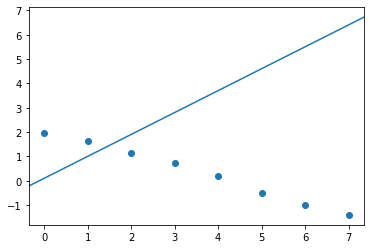

In [7]:
regression_plot(x, y, m, b)

In [8]:
def MSE(my_yhat, my_y):
    sigma = torch.sum((my_yhat - my_y)**2)
    return sigma / len(my_y)

In [11]:
yhat = regression(x, m, b)
print(yhat)

tensor([0.1000, 1.0000, 1.9000, 2.8000, 3.7000, 4.6000, 5.5000, 6.4000],
       grad_fn=<AddBackward0>)


In [12]:
#Cost function
C = MSE(yhat, y)
print(C)

tensor(18.8104, grad_fn=<DivBackward0>)
